## Case Study : Impact of On Top Products on Ad Performance

The core business of Cars24 is publication and facilitated transaction of vehicle ads for its cutomsers . If customers want to push their listing to be higher ranked and more visible, Cars24 offers On Top Products, namely “Premium” and “Plus”. On Top Products influence the design and position of a listing in the search result list with “Premium“ shown first, followed by “Plus”. And should lead to increased listing performance.
For a sales communication to our customers, i.e. car dealers, we are interested in the increase in performance of listings booked with On Top Products


Datasets consist of following fields

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `article_id`    | unique article identifier   |
| `product_tier` | Japanese language proficiency                    |
| `make_name`  | name of the car manufacturer                 |
| `price`      | price of the article |
| `first_zip_digit`           | first digit of the zip code of the region the article is offered in|
| `first_registration_year`          | year of the first registration of the article                     |
| `created_date`         |  creation date of the listing       |
| `deleted_date`          | deletion date of the listing |
| `search_views`          | number of times the article has been shown as a search result |
| `detail_views`          | number of times the article has been clicked on |
| `stock_days`          | Time in days between the creation of the listing and the deletion of the listing |
| `ctr`          | Click through rate calculated as the quotient of detail_views over search_views |
| `ctr_percentage`          | CTR in Percentage for better visualization |	


In [373]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AS24_Data_Analyst_Case_Study_data_2021_04.csv', sep=';')
df

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224
...,...,...,...,...,...,...,...,...,...,...,...,...
78316,348704581,Basic,Lexus,15740,8,2014,12.07.18,19.10.18,6895.0,230.0,99,0.03335750543872371
78317,359231940,Basic,Hyundai,2950,6,2006,28.09.18,23.10.18,1175.0,16.0,25,0.012936170212765956
78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934446505875078


#### DATA CLEANING
Cleaning the dataset to filter outliers and use for further analysis

In [374]:
# checking for duplicate rows
df_duplicates = df[df.duplicated()]
df_duplicates
# no duplicate rows found

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


In [375]:
df.info()
# found discrepency in ctr column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [376]:
# Checking for invalid CTR
# Found CTR with NaN values:
invalid_ctr = df.isnull().sum()
print(invalid_ctr)
rows_with_invalid_ctr = df[df['ctr'].isnull()]
# Clear NaN values
df = df.dropna()

# checking date format
date_format = '%d.%m.%y'
# convert columns to datetime
df = df.assign(created_date=pd.to_datetime(df['created_date'], format=date_format))
df = df.assign(deleted_date=pd.to_datetime(df['deleted_date'], format=date_format))
# Drop NaT values
df = df.dropna(subset=['created_date'])  # Drop rows where 'created_date' is NaT
df = df.dropna(subset=['deleted_date'])  # Drop rows where 'deleted_date' is NaT
# Take rows where created_date is not less than deleted_date
df = df[df['created_date'] <= df['deleted_date']]
#Since -ve stock days were found in the dataset, recalculating stock days.
df = df.assign(stock_days=(df['deleted_date']-df['created_date']).dt.days)


# created new column ctr_percentage  and  calculated CTR percentage for readability
df = df.assign(ctr_percentage=(df['detail_views']/df['search_views'])*100)
print('***************************************************************')

# (insight)checking product tier categories if they have 0 CTR
ctr_zero = df[(df['ctr_percentage']==0) & (df['product_tier']=='Basic')]
print('Basic listing with 0 CTR :',ctr_zero.shape[0])
ctr_zero = df[(df['ctr_percentage']==0) & (df['product_tier']=='Plus')]
print('Plus listing with 0 CTR :',ctr_zero.shape[0])
ctr_zero = df[(df['ctr_percentage']==0) & (df['product_tier']=='Premium')]
print('Premium listing with 0 CTR :',ctr_zero.shape[0])

# taking only relevent CTR values
df = df[df['ctr_percentage']>0]
# take only valid stock days
df = df[df['stock_days']>0]
# take only valid registration year
df = df[df['first_registration_year']<2024]
# Filtering only rows having less details views than search views on the assuption that detail view can't be reached without going to search view
df = df[df['detail_views']<df['search_views']]



# drop column CTR as it contain invalid  CTR value
df_final = df.drop(columns='ctr').reset_index(drop=True)

# Importing a new CSV  for visulaization & analysis in Tableau
# df_final.info()
df_final.to_csv('data_final.csv', index=True)

print('***************************************************************')
print('Number of rows with Basic product_tier :', (df_final['product_tier']=='Basic').sum())
print('Number of rows with Plus product_tier :', (df_final['product_tier']=='Plus').sum())
print('Number of rows with Premium product_tier :', (df_final['product_tier']=='Premium').sum())

print('***************************************************************')
df_final


article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64
***************************************************************
Basic listing with 0 CTR : 1244
Plus listing with 0 CTR : 0
Premium listing with 0 CTR : 0
***************************************************************
Number of rows with Basic product_tier : 73324
Number of rows with Plus product_tier : 576
Number of rows with Premium product_tier : 2322
***************************************************************


,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr_percentage
0,350625839,Basic,Mitsubishi,16750,5,2013,2018-07-24,2018-08-24,3091.0,123.0,31,3.979295
1,354412280,Basic,Mercedes-Benz,35950,4,2015,2018-08-16,2018-10-07,3283.0,223.0,52,6.792568
2,349572992,Basic,Mercedes-Benz,11950,3,1998,2018-07-16,2018-09-05,3247.0,265.0,51,8.161380
3,350266763,Basic,Ford,1750,6,2003,2018-07-20,2018-10-29,1856.0,26.0,101,1.400862
4,355688985,Basic,Mercedes-Benz,26500,3,2014,2018-08-28,2018-09-08,490.0,20.0,11,4.081633
...,...,...,...,...,...,...,...,...,...,...,...,...
76217,348704581,Basic,Lexus,15740,8,2014,2018-07-12,2018-10-19,6895.0,230.0,99,3.335751
76218,359231940,Basic,Hyundai,2950,6,2006,2018-09-28,2018-10-23,1175.0,16.0,25,1.361702
76219,362425932,Basic,Volkswagen,7850,8,2014,2018-11-04,2018-11-21,448.0,21.0,17,4.687500
76220,357164227,Basic,Toyota,13945,5,2011,2018-09-04,2018-10-02,1617.0,29.0,28,1.793445


In [377]:
# Checking & Finding for duplicate listing with same article id
duplicated_rows = df_final['article_id'].duplicated()
#Assigning duplicate ids to a variable
duplicate_ids = df_final[duplicated_rows]['article_id']
# Filter all rows including duplicate article ids
df_filtered = df_final[df_final['article_id'].isin(duplicate_ids)]
df_filtered.sort_values(by='article_id')

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr_percentage
49052,350214314,Premium,Opel,8250,5,2012,2018-07-20,2018-07-26,67.0,5.0,6,7.462687
38680,350214314,Basic,Opel,8250,5,2012,2018-07-20,2018-08-01,134.0,10.0,12,7.462687
61811,350214315,Basic,Nissan,13650,5,2009,2018-07-20,2018-08-01,368.0,16.0,12,4.347826
15577,350214315,Premium,Nissan,13650,5,2009,2018-07-20,2018-07-26,184.0,8.0,6,4.347826
38854,354755822,Plus,Mercedes-Benz,6950,7,2005,2018-08-20,2018-10-18,2827.0,202.0,59,7.145384
64566,354755822,Basic,Mercedes-Benz,6950,7,2005,2018-08-20,2018-10-20,5654.0,404.0,61,7.145384
9194,354755824,Basic,Toyota,10950,7,2010,2018-08-20,2018-10-20,4784.0,222.0,61,4.640468
68525,354755824,Plus,Toyota,10950,7,2010,2018-08-20,2018-10-18,2392.0,111.0,59,4.640468
6282,354755829,Basic,Ford,10950,7,2009,2018-08-20,2018-10-20,5126.0,242.0,61,4.721030
33052,354755829,Plus,Ford,10950,7,2009,2018-08-20,2018-10-18,2563.0,121.0,59,4.721030


Note : Not removing the duplicate ids since the product_tier is different and assuming that article id is not changed when user switch from basic to premium / plus


#### DATA ANALYSIS

Mean of Basic Product 4.7504908052233645
Mean of Premium Product 3.5780817470557214
Mean of Plus Product 4.099116600936155


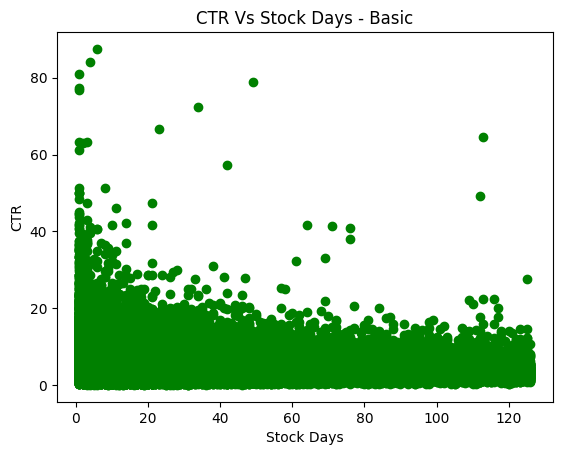

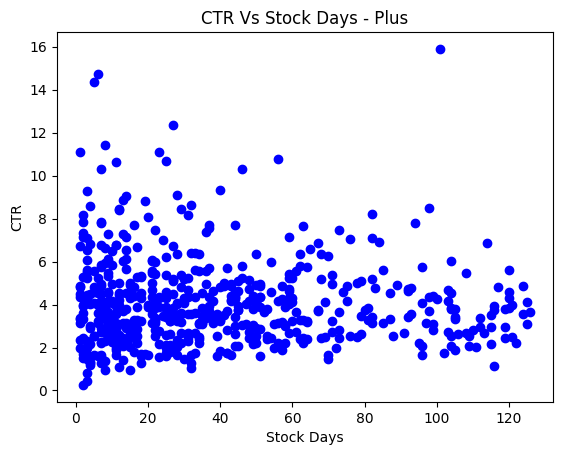

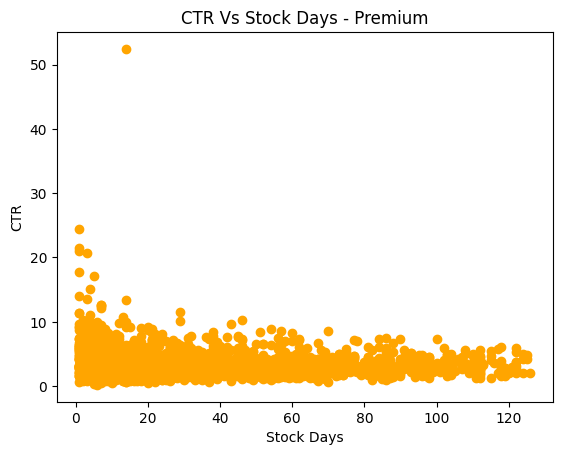

In [378]:
# (insight)Calculating Mean of product tier's CTR
df_basic = df_final[df_final['product_tier']=='Basic']['ctr_percentage'].mean()
print('Mean of Basic Product',df_basic)
df_premium = df_final[df_final['product_tier']=='Premium']['ctr_percentage'].mean()
print('Mean of Premium Product',df_premium)
df_plus = df_final[df_final['product_tier']=='Plus']['ctr_percentage'].mean()
print('Mean of Plus Product',df_plus)
# Mean comparison of product tier is irrelevant due to large number of articles in Basic catgeory with extreme deviation.

# Analyzing CTR Vs Stock Days distribution
plt.scatter(x='stock_days',y='ctr_percentage',data=df_final[df_final['product_tier']=='Basic'],color='Green')
plt.xlabel('Stock Days')
plt.ylabel('CTR')
plt.title('CTR Vs Stock Days - Basic')
plt.show()

plt.scatter(x='stock_days',y='ctr_percentage',data=df_final[df_final['product_tier']=='Plus'],color='Blue')
plt.xlabel('Stock Days')
plt.ylabel('CTR')
plt.title('CTR Vs Stock Days - Plus')
plt.show()

plt.scatter(x='stock_days',y='ctr_percentage',data=df_final[df_final['product_tier']=='Premium'],color='Orange')
plt.xlabel('Stock Days')
plt.ylabel('CTR')
plt.title('CTR Vs Stock Days - Premium')
plt.show()


Last Stock Day value for Product Basic 3.215986820900333
Last Stock Day value for Product Plus 3.6347005584440595
Last Stock Day value for Product Premium 2.0968834688346885


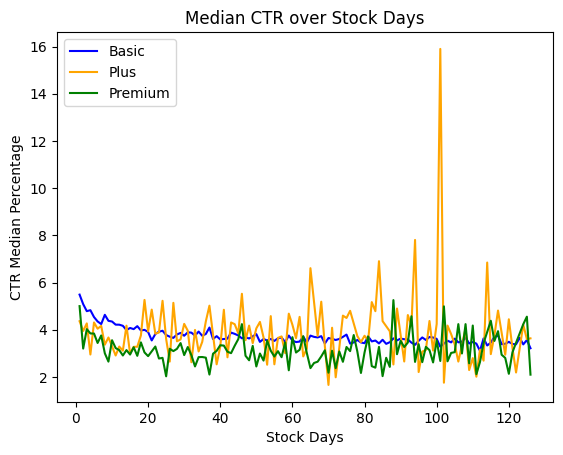

In [379]:
# Grouping by Product Tier and ploting the meadian for articles over stock days

df_grouped = df_final.groupby(['product_tier'], as_index=False)
df_product_basic = df_grouped.get_group(('Basic',))
df_product_plus = df_grouped.get_group(('Plus',))
df_product_premium = df_grouped.get_group(('Premium',))

data_basic_final = df_product_basic.groupby(['stock_days','product_tier'], as_index=False)['ctr_percentage'].median()
data_plus_final = df_product_plus.groupby(['stock_days','product_tier'], as_index=False)['ctr_percentage'].median()
data_premium_final = df_product_premium.groupby(['stock_days','product_tier'], as_index=False)['ctr_percentage'].median()

print('Last Stock Day value for Product Basic',data_basic_final['ctr_percentage'].iloc[-1])
print('Last Stock Day value for Product Plus',data_plus_final['ctr_percentage'].iloc[-1])
print('Last Stock Day value for Product Premium',data_premium_final['ctr_percentage'].iloc[-1])
plt.xlabel('Stock Days')
plt.ylabel('CTR Median Percentage')
plt.title('Median CTR over Stock Days')
plt.plot(data_basic_final['stock_days'],data_basic_final['ctr_percentage'],color='Blue',label='Basic')
plt.plot(data_plus_final['stock_days'],data_plus_final['ctr_percentage'],color='Orange',label='Plus')
plt.plot(data_premium_final['stock_days'],data_premium_final['ctr_percentage'],color='Green',label='Premium')
plt.legend()
plt.show()


